In [4]:
using JuliaAcademyData
activate("World of machine learning")
using Pkg, Images, ImageMagick
using Knet: Knet, dir, minibatch,Data

 Activating environment at `C:\Users\XeonAJ\.julia\packages\JuliaAcademyData\1to3l\courses\World of machine learning\Project.toml`
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1260
┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


In [5]:
# This loads the MNIST handwritten digit recognition dataset:

# Knet.dir constructs a path relative to Knet root
include(Knet.dir("data","mnist.jl"))

# mnist() loads MNIST data and converts into Julia arrays
xtrn, ytrn, xtst, ytst = mnist()
println.(summary.((xtrn, ytrn, xtst, ytst)))

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg D:\buildbot\worker\package_win64\build\usr\share\julia\stdlib\v1.4\Pkg\src\Pkg.jl:531
┌ Info: Loading MNIST...
└ @ Main C:\Users\XeonAJ\.julia\packages\Knet\bTNMd\data\mnist.jl:33


28×28×1×60000 Array{Float32,4}
60000-element Array{UInt8,1}
28×28×1×10000 Array{Float32,4}
10000-element Array{UInt8,1}


(nothing, nothing, nothing, nothing)

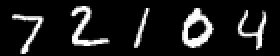

In [8]:
# mnistview(x,i) converts the i'th instance in x into an image
# Here is the first five images from the test set:
hcat([mnistview(xtst, i) for i = 1:5]...)

In [9]:
# `minibatch` splits the data tensors to small chunks called minibatches.
# It returns a Knet.Data struct: an iterator of (x,y) pairs.

dtrn = minibatch(xtrn,ytrn,100)
dtst = minibatch(xtst,ytst,100)

Data{Tuple{Array{Float32,4},Array{UInt8,1}}}(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], UInt8[0x07 0x02 … 0x05 0x06], 100, 10000, false, 9901, 1:10000, false, (28, 28, 1, 10000), (10000,), Array{Float32,4}, Array{UInt8,1})

In [10]:
# Each minibatch is an (x,y) pair where x is 100 (28x28x1) images and y are the corresponding 100 labels.
# Here is the first minibatch in the test set:

println.(summary.(first(dtst)))

28×28×1×100 Array{Float32,4}
100-element Array{UInt8,1}


(nothing, nothing)

In [11]:
# Iterators can be used in for loops, e.g. `for (x,y) in dtrn`
# dtrn generates 600 minibatches of 100 images (total 60000)
# dtst generates 100 minibatches of 100 images (total 10000)

n = 0
for (x,y) in dtrn
    n += 1
end
n

600